In [12]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob
from keras.models import load_model

# CNN Review
<img src="cnn.png">

### Define batch and epoch size

In [2]:
batch_size = 32 # 2^5
epoch_size = 100

## 1) Read Data and Preprocessing

In [3]:
train_path = "data/Training/"
test_path = "data/Test/"

### Read Sample Image

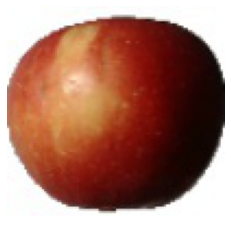

In [4]:
img = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

### How many fruits are there?

In [5]:
className = glob(train_path + '/*' )
className[0:10] # first ten files.

['data/Training\\Apple Braeburn',
 'data/Training\\Apple Crimson Snow',
 'data/Training\\Apple Golden 1',
 'data/Training\\Apple Golden 2',
 'data/Training\\Apple Golden 3',
 'data/Training\\Apple Granny Smith',
 'data/Training\\Apple Pink Lady',
 'data/Training\\Apple Red 1',
 'data/Training\\Apple Red 2',
 'data/Training\\Apple Red 3']

In [6]:
numberOfClass = len(className)
numberOfClass # 131 classes (folders)

131

In [7]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


## 2-Data Generation and Read All Data
Her bir meyveden 400 civarı görsel var. Bu veri sayısı deep learning için az bir sayıdır. Bu yüzden veri çoklaması(image çoklaması) yapılacaktır.
- Bunun için türlü türlü rotation yapabiliriz. Aynı veriyi kullanarak zoom yaparak, yatay, 30 derece gibi açılarda oluşturmuş olacağız.
- Test datasında yalnızca normalize yaparız, train datasında yaptığımız için. Diğer değerleriyle oynamıyoruz, orijinalliği bozulmaması adına. 

In [8]:
train_data_gen = ImageDataGenerator(rescale= 1./255, # Normalize
                   shear_range = 0.3, # rotation_size 30'
                   horizontal_flip=True, # rotation_horizontal
                   zoom_range = 0.3)

test_data_gen = ImageDataGenerator(rescale= 1./255)

### NOTE
- **flow_from_directory** methoduyla Keras'a bir path veririz, örneğin **traint_path** ve bu path sayesinde Keras her bir meyveyi farklı sınıfa ayırıyor, her bir meyvenin resimlerini de o sınıfın içerisine depoluyor.

In [9]:
train_generator = train_data_gen.flow_from_directory(
        train_path, 
        target_size = x.shape[:2], #(100, 100, 3) => 3'ü almaya gerek yok.
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical") # There is more than 1 class.

test_generator = test_data_gen.flow_from_directory(
        test_path, 
        target_size=x.shape[:2],
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical") # There is more than 1 class.

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


## 3-Create Model

In [10]:
model = Sequential()
# First Conv Layer
model.add(Conv2D(32, (3, 3), input_shape = x.shape)) # 32 filters or 32 feature map, and filter size=(3,3)
model.add(Activation("relu"))
model.add(MaxPooling2D()) #default 2x2

# Second Conv Layer
model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

# Third Conv Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024)) # 1024 nerons
model.add(Activation("relu"))
model.add(Dropout(0.5)) # Close Random 50%
model.add(Dense(numberOfClass)) # outputtaki nöron sayısı output sayısı kadar olmalı.
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

## 4-Train(Fit) Data

### NOTE
Her meyveden ortalama 400 resim var, 1600-400=1200 resim imageDataGenerator'dan geliyor.

In [11]:
hist = model.fit(
        train_generator, #train_generator contains train_data
        steps_per_epoch = 1600 // batch_size, 
        epochs = epoch_size,
        validation_data = test_generator,
        validation_steps = 800 // batch_size)

Epoch 1/100
50/50 [==============================] - 25s 483ms/step - loss: 4.8030 - accuracy: 0.0325 - val_loss: 4.4203 - val_accuracy: 0.0600
Epoch 2/100
50/50 [==============================] - 24s 485ms/step - loss: 3.8369 - accuracy: 0.1019 - val_loss: 3.0900 - val_accuracy: 0.2037
Epoch 3/100
50/50 [==============================] - 23s 470ms/step - loss: 3.0369 - accuracy: 0.2219 - val_loss: 2.1612 - val_accuracy: 0.4275
Epoch 4/100
50/50 [==============================] - 24s 474ms/step - loss: 2.5316 - accuracy: 0.3050 - val_loss: 1.7360 - val_accuracy: 0.4938
Epoch 5/100
50/50 [==============================] - 24s 483ms/step - loss: 2.1203 - accuracy: 0.3875 - val_loss: 1.5801 - val_accuracy: 0.5612
Epoch 6/100
50/50 [==============================] - 23s 464ms/step - loss: 1.8080 - accuracy: 0.4762 - val_loss: 1.2735 - val_accuracy: 0.6488
Epoch 7/100
50/50 [==============================] - 24s 473ms/step - loss: 1.5044 - accuracy: 0.5350 - val_loss: 1.4015 - val_accuracy:

In [60]:
# save history and model result
import json
with open("history.json","w") as f:
    json.dump(hist.history, f)
model.save("model1.h5")

In [64]:
# load history and model result
import codecs
with codecs.open("history.json", "r",encoding = "utf-8") as f:
    load_hist = json.loads(f.read())
model1 = load_model("model1.h5")

## 5-Model Evaluation

In [66]:
# print(hist.history.keys()) # key and values

In [67]:
load_hist.keys() # key and values in json file

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

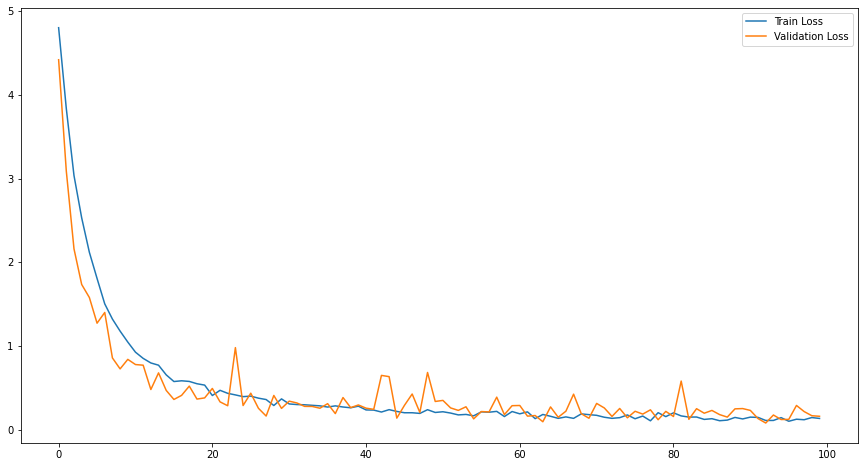

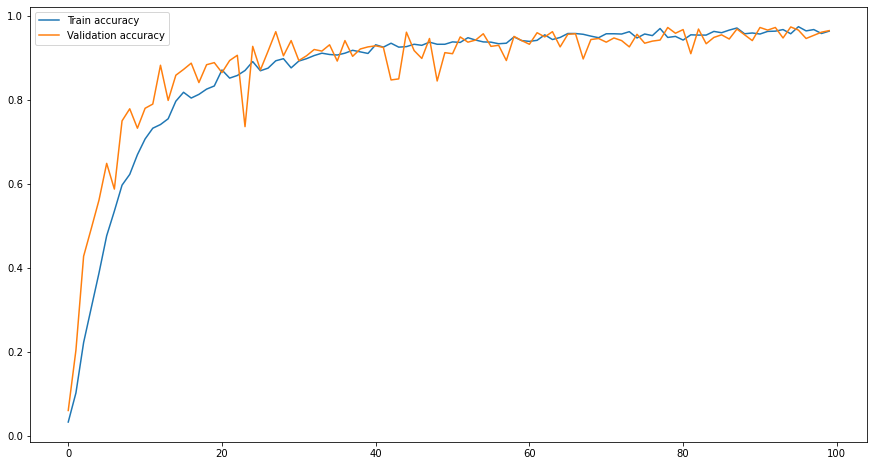

In [69]:
plt.figure(figsize = (15, 8))
# plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(load_hist["loss"], label = "Train Loss")
plt.plot(load_hist["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure(figsize = (15, 8))
plt.plot(load_hist["accuracy"], label = "Train accuracy")
plt.plot(load_hist["val_accuracy"], label = "Validation accuracy")
plt.legend()
plt.show()